In [149]:
import cv2
import os
import random
import numpy as np
from PIL import Image, ImageOps

import torch
import torchvision
from torchvision.transforms import functional as TF
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

from matplotlib import pyplot as plt
%matplotlib inline

In [134]:
train_dir = './data_madori/train'
batch_size = 16

In [135]:
def imshow(img1, img2):
    npimg1 = img1.numpy()
    npimg2 = img2.numpy()
    
    plt.subplot(121)
    plt.imshow(np.transpose(npimg1, (1, 2, 0)))
    
    plt.subplot(122)
    plt.imshow(np.transpose(npimg2, (1, 2, 0)))
    
    plt.show()    

In [156]:
class MadoriDataset(Dataset):
    def __init__(self, data_dir, img_size=(256, 256)):
        self.img_paths = [os.path.join(train_dir, x) for x in os.listdir(data_dir)]
        self.img_size = (256, 256)
        
    def __len__(self):
        return len(self.img_paths)
    
    def _resize(self, img):
        img.thumbnail(self.img_size, Image.ANTIALIAS)
        w, h = img.size
        return TF.pad(img, (0,0,256-w,0), padding_mode='edge') if h == 256 else \
               TF.pad(img, (0,0,0,256-h), padding_mode='edge')
    
    def _aug_img(self, image):
        if random.random() > 0.5:
            image = TF.rotate(image, random.choice([90, 180, 270]))
        if random.random() > 0.5:
            image = TF.hflip(image)
        if random.random() > 0.5:
            image = TF.vflip(image)
        return image
    
    def __getitem__(self, idx):
        img_path1 = self.img_paths[idx]
        img1 = self._resize(Image.open(img_path1))
        label = random.randint(0, 1)
        if label:
            # choose similar floorplan by augmentation
            img2 = self._aug_img(img1)
        else:
            # choose different floorplan
            img_path2 = img_path1
            while img_path2 == img_path1:
                img_path2 = random.choice(self.img_paths)
            img2 = self._resize(Image.open(img_path2))
        print(img1)
        return TF.to_tensor(img1), TF.to_tensor(img2), label

In [157]:
dset_loader = DataLoader(MadoriDataset(train_dir), 
                           batch_size=batch_size, 
                           shuffle=True)

<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB0108F588>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB01096C18>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB01096C18>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB01096C18>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB01096DD8>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB01096C18>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB01096F28>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012E10>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012E10>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012E10>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012DA0>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012AC8>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012630>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012048>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00012CF8>
<PIL.Image.Image image mode=RGB size=256x256 at 0x2AB00

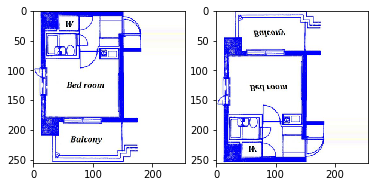

tensor(1)


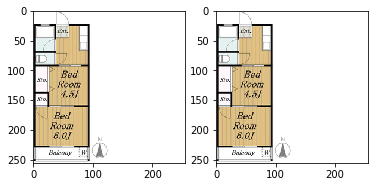

tensor(1)


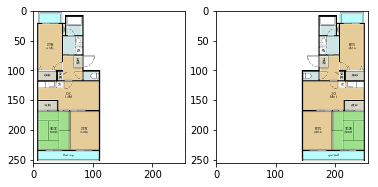

tensor(1)


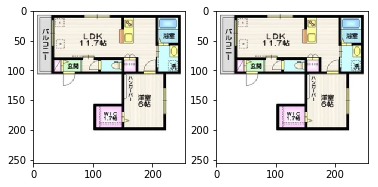

tensor(0)


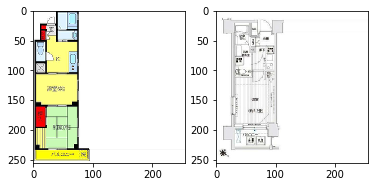

tensor(0)


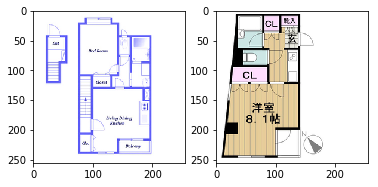

tensor(0)


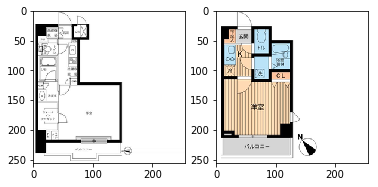

tensor(0)


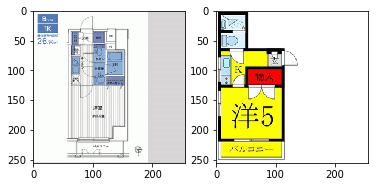

tensor(0)


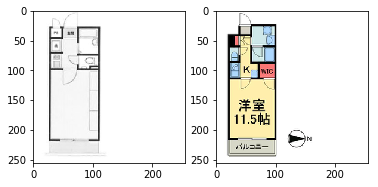

tensor(1)


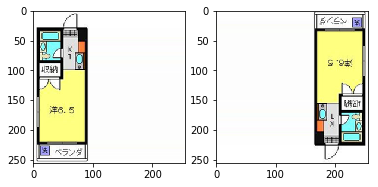

tensor(0)


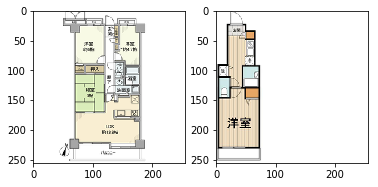

tensor(0)


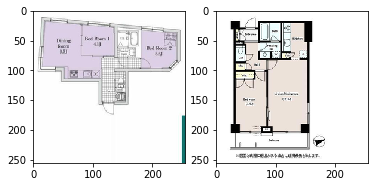

tensor(0)


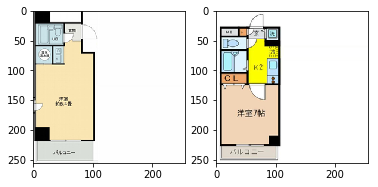

tensor(1)


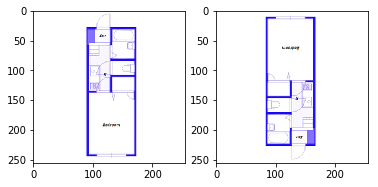

tensor(0)


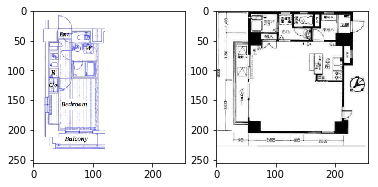

tensor(1)


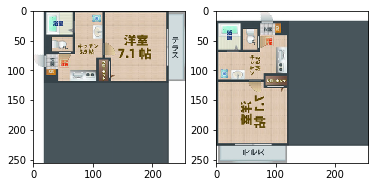

In [158]:
for i, batch in enumerate(dset_loader):
    img1, img2, label = batch
    print(img1.size(), img2.size(), label)
    for k in range(16):
        print(label[k])
        imshow(img1[k], img2[k])
    break

256 174


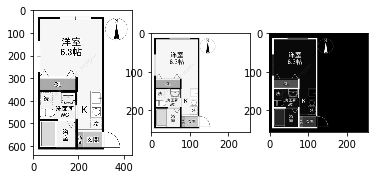

In [179]:
def pad(img):
    w, h = img.size
    print(h, w)
    return TF.pad(img, (0,0,256-w,0), padding_mode='edge') if h == 256 else \
           TF.pad(img, (0,0,0,256-h), padding_mode='edge')

def resize(img):
    w, h = img.size
    if w < h:
        a, b = 256.0 / h, int(w * a)
        img = img.resize((b, 256), Image.BILINEAR)
    else:
        a, b = 256.0 / w, int(h * a)
        img = img.resize((256, b), Image.BILINEAR)
    return img

for i, x in enumerate(os.listdir(train_dir)):
    #if i > 0: break
    x = os.path.join(train_dir, x)
    
    plt.subplot(131)
    arr = Image.open(x).convert('L')
    plt.imshow(arr)

    plt.subplot(132)
    arr = resize(arr)
    arr = pad(arr)
    plt.imshow(arr)
    
    plt.subplot(133)
    arr = ImageOps.invert(arr)
    plt.imshow(arr)
    
    plt.show()
    break